# Job postings Fraud Detection Analysis 

<img src="Images/Job_Search.webp" style="width:700px;height:600px">

## Project Goal
The objective of this project is to detect fraudulent job postings to improve user trust and reduce the impact of scams on job platforms and recruitment agencies.

## Overview
This project analyzes fraudulent and non-fraudulent job postings from a dataset set obtained from kaggle. This dataset contains job descriptions consisting of both real and fake job postings on an international level. The data consists of both textual information and meta-information about the jobs. This analysis aims to create classification models which can learn the job descriptions which are fraudulent based on its features such as title, location, description, and other attributes provided in the dataset. This will help the company's platform avoid scams and improve the integrity of job listings.

## 1.Business Understanding
Recruit Holdings' company aims to improve Glassdoor, their jobseeking platform, to maintain the integrity of their listings ensuring a positive user experience. However, fraudulent job postings are a growing concern not only misleading job seekers leading to financial loss and wasted effort, but also tarnishing the platform’s reputation. This results in a decrease in user engagement due to a decrease in trustworthiness, lower customer retention, and potential legal ramifications. Therefore, the company critically needs an automated solution to detect and remove fraudulent job postings before they can cause harm.

This analysis, therefore, aims in coming up with a reliable classification model that can predictively identify and filter out fraudulent job postings, thereby improving the trustworthiness of the platform and safeguarding users from potential scams to enhance user experience. This analysis will consider the following:

1.What is the distribution of fraudulent and non-fraudulent job postings?

2.What features are significant in detecting of fraudulent and non-fraudulent job postings?

3.What is the effectiveness of our model in predicting Fraudulent and Nonn-Fraudulent job postings?


## 2.Data Understanding
This dataset is obtained from kaggle and contains about 18K job descriptions consisting of both real and fake job postings. The dataset contains a mix of textual information and meta-information, which are crucial for understanding and predicting fraudulent job postings. 

The features in this dataset include title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry and function. 
The target variable in this analysis is the fraudulent column that states the fraudulent and non-fraudulent jobs.

The analysis will aims to:

Evaluate the balance between real and fake job postings to understand the potential challenges of imbalanced classes incase which specialized techniques like SMOTE or class weighting may be necessary during model training.

Identify any missing values in the dataset, especially in key features like 'Description' or 'Company Profile'.

Analyze correlations between features and the target  variable to identify the most predictive features. 
Features such as 'Has Company Logo' and 'Has Questions' could be significant indicators of job authenticity.


## 3.Data Preparation

### Loading the dataset

In [1]:
#import the library
import pandas as pd
#Load the dataset
df=pd.read_csv('Data/fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [2]:
df.shape #Number of rows and columns

(17880, 18)

In [3]:
df.describe()# Get statistical summary of the data

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()#Get a summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

### Data Cleaning
#### a) Missing Values
From the above summary of the data, there are columns with missing values that are crucial for our analysis. 

In [5]:
df.isna().sum()#Checking for null values

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
#Identifying of missing values for each column in relation to entire data
df.isna().mean().sort_values(ascending= False)

salary_range           0.839597
department             0.645805
required_education     0.453300
benefits               0.403244
required_experience    0.394295
function               0.361018
industry               0.274217
employment_type        0.194128
company_profile        0.185011
requirements           0.150727
location               0.019351
description            0.000056
title                  0.000000
fraudulent             0.000000
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
job_id                 0.000000
dtype: float64

#### Dropping rows
The 'description' column has only one missing hence best option is to drop that row.

In [7]:
df.dropna(subset=['description'], inplace=True)

#### Replacing the null values
For the rest of the data we replace the null values with the string 'Missing' as dropping or replacing the data may greatly affect the analysis.

In [8]:
df.fillna('Missing', inplace=True)

In [9]:
df.isna().sum() #Checking for any mssing values

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

#### b)Feature Engineering
This transforms categorical features to numeric.

In [10]:
#import libraries
import numpy as np
#Copy of the dataset
data=df.copy()
# Encode categorical features using one-hot encoding
categorical_features = ['location', 'department', 'salary_range', 'employment_type', 
                        'required_experience', 'required_education', 'industry', 'function']

# Apply one-hot encoding to categorical features
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

data = data.select_dtypes(include=[np.number])

# Verify the dataframe structure after encoding and dropping columns
data.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,"location_AE, , Abudhabi","location_AE, , Dubai","location_AE, , Media City | Dubai","location_AE, AZ,","location_AE, AZ, Abudhabi",...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Correlation and Multicollinearity for Numeric Features
In this section, we check for correlation of the features and the target variable as well as check for multicollinearity between the features.

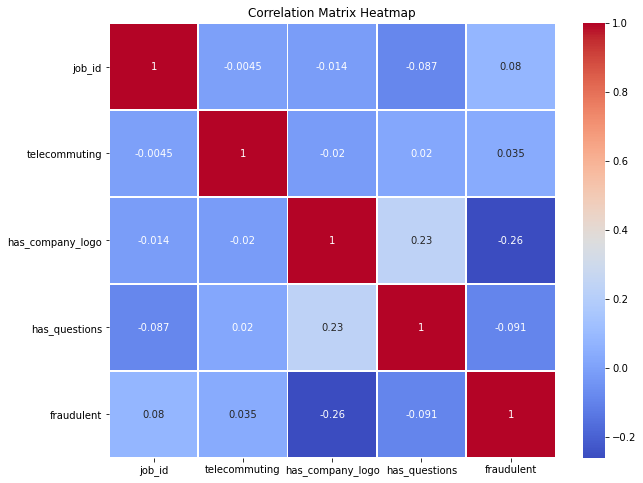

In [11]:
#import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with the target variable 'fraudulent'
target_correlations = correlation_matrix['fraudulent'].sort_values(ascending=False)


# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### Interpretation
Based on the above, except for the correlation between each feature and itself, the correlations are all below 0.5, showing weak to almost no correlation between the features and the target variable.
The correlation between the features are quite weak hence no multicollinearity.

#### Defining X and y and Performing a Train_test_split

In this section, the features and target variable are defined then then data is split for a train_test_split. The data is also normalized by applying a scaler.

In [12]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define target and features
X = data.drop('fraudulent', axis=1)
y = data['fraudulent']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4.Modelling
#### Model Selection and Evaluation

For this analysis, we will use three types of models: Logistic Regression, Random Forest, and Gradient Boosting.
We’ll also perform hyperparameter tuning for Gradient Boosting.

### i) Logistic Regression
The logistic regression model provides a quick baseline in binary classification problems because of its simplicity and ease of interpretation.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Train the model on scaled data
lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predict and evaluate
lr_pred = lr.predict(X_test_scaled)
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]):.4f}")


Logistic Regression Performance:
[[4938  166]
 [ 103  157]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5104
           1       0.49      0.60      0.54       260

    accuracy                           0.95      5364
   macro avg       0.73      0.79      0.76      5364
weighted avg       0.96      0.95      0.95      5364

ROC-AUC: 0.9067


##### Interpretation:

The Logistic Regression model shows a high overall accuracy (95%) but struggles with classifying fraudulent postings (class 1), indicated by the low precision and recall for this class. The ROC-AUC score of 91% is good, suggesting that the model is effective at distinguishing between the two classes(fraudulent & non-fraudulent postings). However, the imbalanced class performance indicates that the model may not be ideal for scenarios where detecting fraud is critical.

### ii) Decision Tree
Decision Tree is used so as to capture non-linear relationships between features and to rank features in terms of their importance, helping in identifying the most predictive features in your dataset.

In [14]:
#import library
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, dt.predict_proba(X_test_scaled)[:, 1]))

Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5104
           1       0.83      0.71      0.77       260

    accuracy                           0.98      5364
   macro avg       0.91      0.85      0.88      5364
weighted avg       0.98      0.98      0.98      5364

ROC AUC Score: 0.8521446226187606


##### Interpretation:

The Decision Tree model performs very well in predicting non-fraudulent postings, with high precision, recall, and F1-score. It also improves on classifying fraudulent postings compared to Logistic Regression with an overall accuracy of 98%. However, the ROC-AUC score of 85% is lower compared to Logistic Regression, indicating less robustness in differentiating between the classes.
To further improve model performance, we can move to an ensemble method that combines multiple decision trees, that is, Random Forest and Gradient Boosting.

### iii)Random Forest
This builds multiple decision trees and aggregates their predictions. The Random Forest model improves generalization and reduces overfitting compared to a single decision tree. It provides better performance on imbalanced data by incorporating class weights.

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
rf_pred = rf.predict(X_test_scaled)
print("Random Forest Performance:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1]):.4f}")

Random Forest Performance:
[[5101    3]
 [  86  174]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5104
           1       0.98      0.67      0.80       260

    accuracy                           0.98      5364
   macro avg       0.98      0.83      0.89      5364
weighted avg       0.98      0.98      0.98      5364

ROC-AUC: 0.9777


##### Interpretation:

Random Forest demonstrates a strong balance between precision and recall, particularly excelling in fraud detection. The model’s high ROC-AUC score reflects its robustness in distinguishing between fraudulent and non-fraudulent job postings. This model is more reliable in detecting fraudulent postings compared to the Logistic Regression and Decision Tree models.


### iv) Gradient Boosting
Gradient Boosting often achieves better predictive accuracy than other models. It can be tuned with various hyperparameters (e.g., learning rate, number of trees, tree depth) to achieve the best performance.

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Expanded parameter grid
param_grid = {
    'n_estimators': [100],            
    'max_depth': [3],                 
    'learning_rate': [0.1],           
    'min_samples_split': [2]           
}

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV with fewer folds
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best model from grid search
best_gb = grid_search.best_estimator_

# Predict and evaluate
gb_pred = best_gb.predict(X_test_scaled)
print("Gradient Boosting Performance:")
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, best_gb.predict_proba(X_test_scaled)[:, 1]):.4f}")

Gradient Boosting Performance:
[[5094   10]
 [ 104  156]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5104
           1       0.94      0.60      0.73       260

    accuracy                           0.98      5364
   macro avg       0.96      0.80      0.86      5364
weighted avg       0.98      0.98      0.98      5364

ROC-AUC: 0.9432


##### Interpretation:

The Gradient Boosting model provides a strong performance with an excellent ROC-AUC score. However, its recall for fraudulent postings is lower compared to Random Forest, indicating a higher rate of false negatives. This model is precise but less effective in detecting all fraudulent jobs.

## 5.Evaluation and Selection
Based on the analysis of the ROC-AUC above, the best performing model is Random Forest as it has the highest accuracy of 97.8% compared to the other models.It offers a well-balanced approach to detecting both fraudulent and non-fraudulent job postings, with high precision and recall across both classes. The model’s ROC-AUC score of 0.9777 indicates its superior ability to distinguish between the two classes, which is crucial for accurately identifying fraudulent postings.

The Random Forest model’s robustness is attributed to its ensemble nature, where multiple decision trees are aggregated to reduce variance and avoid overfitting. This leads to a more generalized model that performs well on unseen data. Given the critical need for a reliable and accurate fraud detection system on the Glassdoor platform, Random Forest’s ability to minimize both false positives and false negatives makes it the optimal choice. This model enhances platform trustworthiness and ensures that users are protected from potentially harmful job postings.

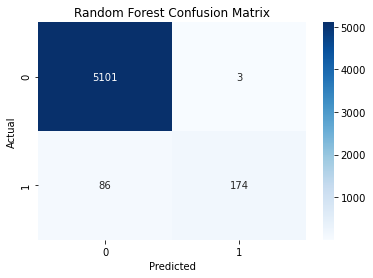

In [17]:
# Plot confusion matrix for the best model
cm = confusion_matrix(y_test,rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [18]:
print("""The Random Forest model is good as it has high values for TP and TN, and low values for FP and FN, as seen in the heatmap. 
This balance ensures that the model is both accurate and reliable in detecting fraud 
without causing unnecessary false alarms.""")

The Random Forest model is good as it has high values for TP and TN, and low values for FP and FN, as seen in the heatmap. 
This balance ensures that the model is both accurate and reliable in detecting fraud 
without causing unnecessary false alarms.


## 6.Visualization

### a) Distribution of Fraudulent Vs Non-Fraudulent job Postings

Based on the first question: What is the distribution of fraudulent and non-fraudulent job postings?

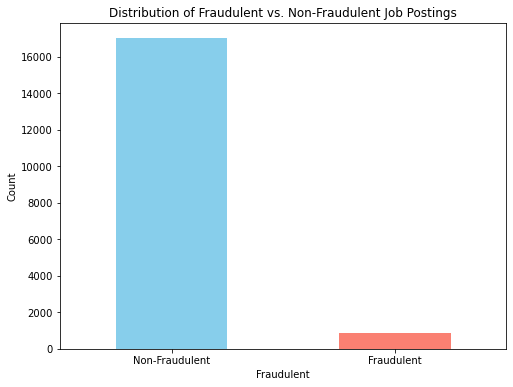

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot class distribution
plt.figure(figsize=(8, 6))
data['fraudulent'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Job Postings')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.show()

In [20]:
print("""Based on the graph above, Non-Fraudulent job postings are more as compared to 
Fraudulent job postings""")

Based on the graph above, Non-Fraudulent job postings are more as compared to 
Fraudulent job postings


### b) Distribution of Fraudulent Vs Non-Fraudulent job Postings based on 'has_company_logo'
In regards to the second question:What features are significant in detecting of fraudulent and non-fraudulent job postings?

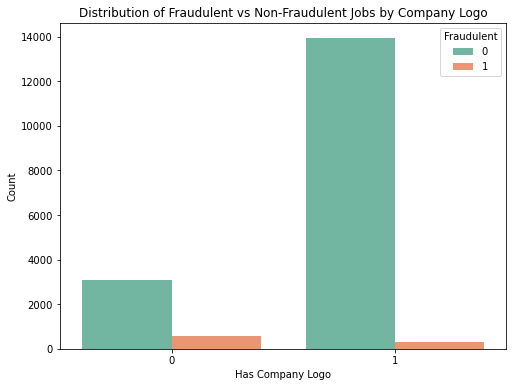

In [21]:
# Plot distribution based on 'has_company_logo'
plt.figure(figsize=(8, 6))
sns.countplot(x='has_company_logo', hue='fraudulent', data=data, palette='Set2')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Jobs by Company Logo')
plt.xlabel('Has Company Logo')
plt.ylabel('Count')
plt.legend(title='Fraudulent')
plt.show()

In [22]:
print("""The distribution above shows that based on job postings with or without Company logo, 
most are non-fraudulent.
However, postings with the company logo have more Non-fraudulent job postings.
Job postings without company logo have a slightly higher number of fraudulent job postings.""")

The distribution above shows that based on job postings with or without Company logo, 
most are non-fraudulent.
However, postings with the company logo have more Non-fraudulent job postings.
Job postings without company logo have a slightly higher number of fraudulent job postings.


### c) Distribution of Fraudulent Vs Non-Fraudulent job Postings based on 'has_questions'

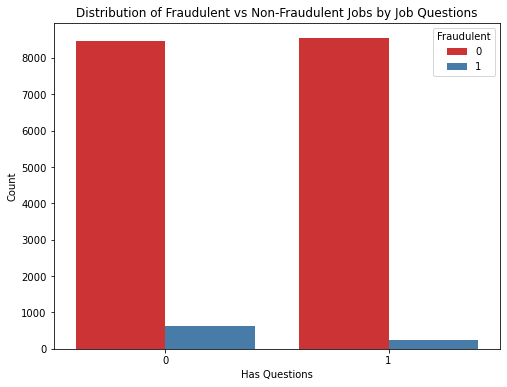

In [23]:
# Plot distribution based on 'has_questions'
plt.figure(figsize=(8, 6))
sns.countplot(x='has_questions', hue='fraudulent', data=data, palette='Set1')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Jobs by Job Questions')
plt.xlabel('Has Questions')
plt.ylabel('Count')
plt.legend(title='Fraudulent')
plt.show()

In [24]:
print("""From the above graph, Non-fraudulent job postings are more for both postings with 
Questions and those without questions.
Job postings that do not have questions have a higher number of fraudulent job postings.
Therefore, one might conclude that job postings with questions have a low fraudulent count 
hence less prone to fraud cases.""")

From the above graph, Non-fraudulent job postings are more for both postings with 
Questions and those without questions.
Job postings that do not have questions have a higher number of fraudulent job postings.
Therefore, one might conclude that job postings with questions have a low fraudulent count 
hence less prone to fraud cases.


### d) Distribution of Fraudulent Vs Non-Fraudulent job Postings based on Industry

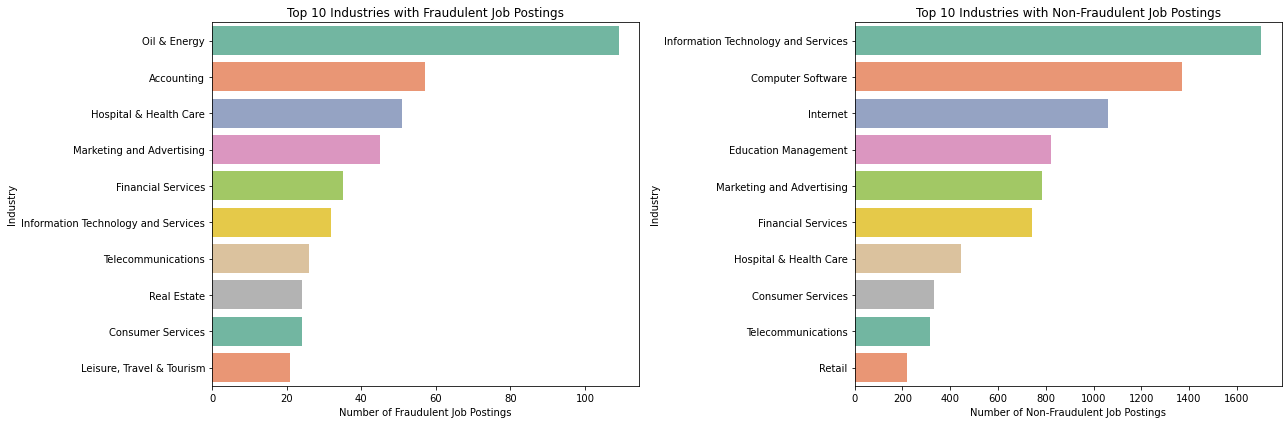

In [25]:
# Get the top 10 industries with the most fraudulent job postings
top_10_fraudulent_industries = df[df['fraudulent'] == 1]['industry'].value_counts().nlargest(11)
# Exclude the first industry of missing 
top_10_fraudulent_industries = top_10_fraudulent_industries.iloc[1:]

# Get the top 10 industries with the most non-fraudulent job postings
top_10_non_fraudulent_industries = df[df['fraudulent'] == 0]['industry'].value_counts().nlargest(11)
# Exclude the first industry
top_10_non_fraudulent_industries = top_10_non_fraudulent_industries.iloc[1:]

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot for top 10 industries with fraudulent job postings
sns.barplot(x=top_10_fraudulent_industries.values, y=top_10_fraudulent_industries.index, palette='Set2', ax=axs[0])
axs[0].set_title('Top 10 Industries with Fraudulent Job Postings')
axs[0].set_xlabel('Number of Fraudulent Job Postings')
axs[0].set_ylabel('Industry')

# Plot for top 10 industries with non-fraudulent job postings
sns.barplot(x=top_10_non_fraudulent_industries.values, y=top_10_non_fraudulent_industries.index, palette='Set2', ax=axs[1])
axs[1].set_title('Top 10 Industries with Non-Fraudulent Job Postings')
axs[1].set_xlabel('Number of Non-Fraudulent Job Postings')
axs[1].set_ylabel('Industry')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [26]:
df.to_csv('Data/Cleaned_fake_job_postings.csv', index=False)

## 7.Conclusion

1.Key Features for Fraud Detection: Features such as the presence of a company logo, job industry and job-related questions were significant in distinguishing between fraudulent and non-fraudulent postings. Job Postings with company logo and those with questions had less fraudulent counts and more non-fraudulent postings. Industries with higher incidences of fraudulent postings were also identified, allowing for targeted monitoring and intervention. These top five indutries to watch out for with fraudulent job postings included Oil&Energy, Accounting, Hospital&Health Care,Marketing & Advertising and Financial Services.

2.Fraudulent Job Postings Identification: The analysis successfully identified key indicators of fraudulent job postings on the platform. Models like Random Forest and Gradient Boosting demonstrated strong performance in detecting fraudulent postings, with Random Forest emerging as the best model due to its superior precision, recall, and ROC-AUC score.

3.Model Effectiveness: The Random Forest model, with its ability to balance high precision and recall, proved to be the most effective in minimizing both false positives and false negatives. This model provides a reliable foundation for the automated detection of fraudulent job postings on the Glassdoor platform.



## 8.Business Recommendations

1.The company can enhance User Awareness. Informing users about common signs of fraudulent job postings, particularly in industries identified as high-risk. Providing educational resources or alerts can empower users to make safer job-seeking decisions.

2.Industry-Specific Monitoring: Given that certain industries have a higher likelihood of fraudulent postings, Glassdoor should consider implementing stricter verification protocols for job listings in these sectors. This could involve additional checks on employer legitimacy before a posting goes live.

3.Implementing the Random Forest Model: Integrating the Random Forest model into the platform’s backend to automatically flag and filter out potential fraudulent job postings. This proactive approach will help in maintaining the platform's integrity and trustworthiness.

4.Regular Model Updates: As fraud tactics evolve, regularly retraining the model with updated data is crucial to maintain its effectiveness. This includes incorporating feedback from flagged and confirmed fraudulent postings.

## 9.Further Analysis

1.Exploration of Additional Features: Further analysis could explore additional features not included in the current dataset, such as employer ratings, historical job posting behavior, and user feedback on job listings. These features could provide deeper insights and improve model accuracy.

2.Textual Analysis Enhancement: Advanced natural language processing (NLP) techniques, such as sentiment analysis or deep learning models, could be employed to better understand the language used in job descriptions and its correlation with fraudulence. This might uncover more nuanced patterns in fraudulent postings.

3.Real-Time Fraud Detection: Investigating the feasibility of real-time fraud detection on the platform. This would involve analyzing the trade-offs between model complexity, performance, and the need for immediate response to potentially fraudulent activity.

